In [1]:
# import libraries
import numpy as np
import pandas as pd
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
mart_df = pd.read_csv('../Datasets/mart_df.csv')

In [3]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
mart_df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [5]:
mart_df.shape

(8523, 12)

In [6]:
mart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
# filling with mean value
mart_df['Item_Weight'].fillna(mart_df['Item_Weight'].mean(),inplace=True)

C:\Users\Jash\AppData\Local\Temp\ipykernel_29248\442289831.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mart_df['Item_Weight'].fillna(mart_df['Item_Weight'].mean(),inplace=True)


Replacing by mode

In [8]:
mart_df['Outlet_Size'].fillna(mart_df['Outlet_Size'].mode()[0],inplace=True)

C:\Users\Jash\AppData\Local\Temp\ipykernel_29248\3698232242.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  mart_df['Outlet_Size'].fillna(mart_df['Outlet_Size'].mode()[0],inplace=True)


In [9]:
mart_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
sns.set()

C:\Users\Jash\AppData\Local\Temp\ipykernel_29248\1215101040.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_Weight'])


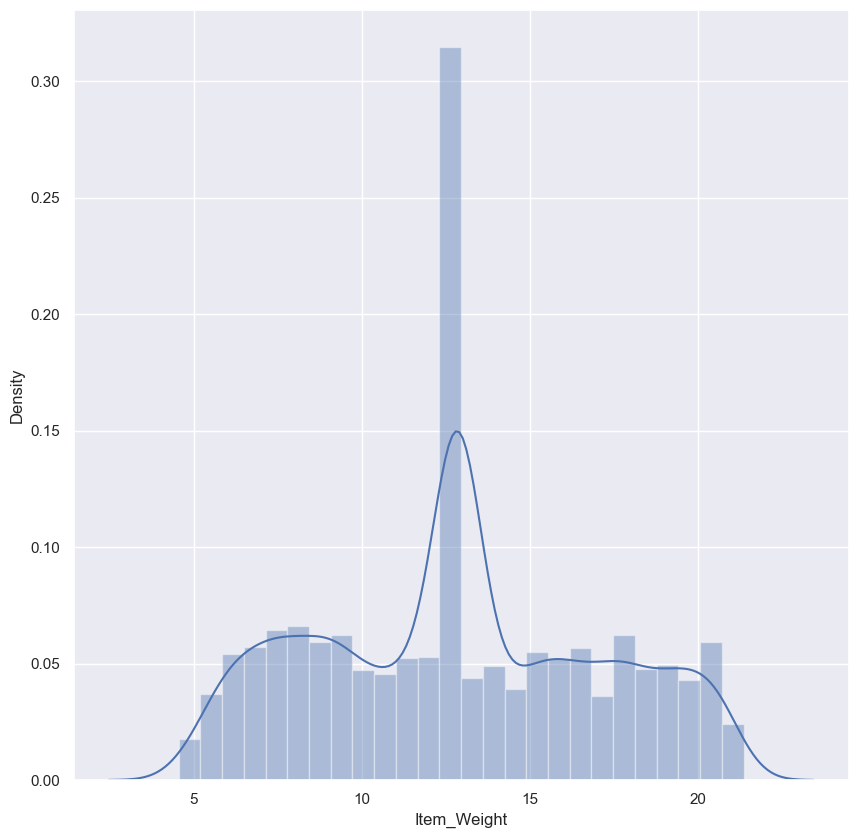

In [11]:
plt.figure(figsize=(10,10))
sns.distplot(mart_df['Item_Weight'])
plt.show()

C:\Users\Jash\AppData\Local\Temp\ipykernel_29248\3610949520.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_Visibility'])


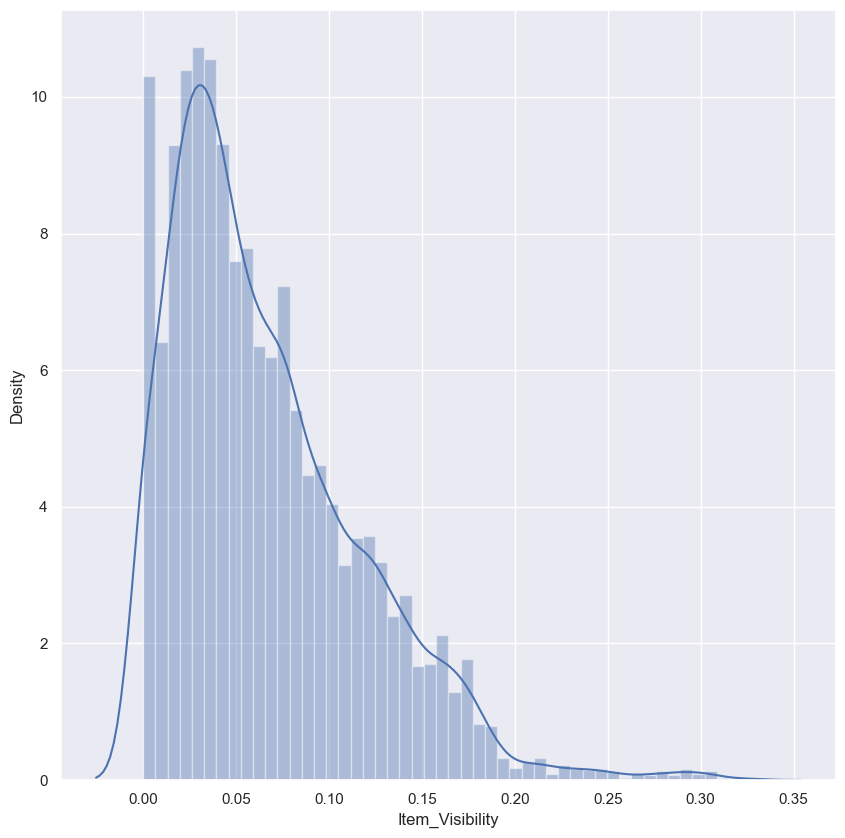

In [12]:
plt.figure(figsize=(10,10))
sns.distplot(mart_df['Item_Visibility'])
plt.show()

C:\Users\Jash\AppData\Local\Temp\ipykernel_29248\2698238848.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_MRP'])


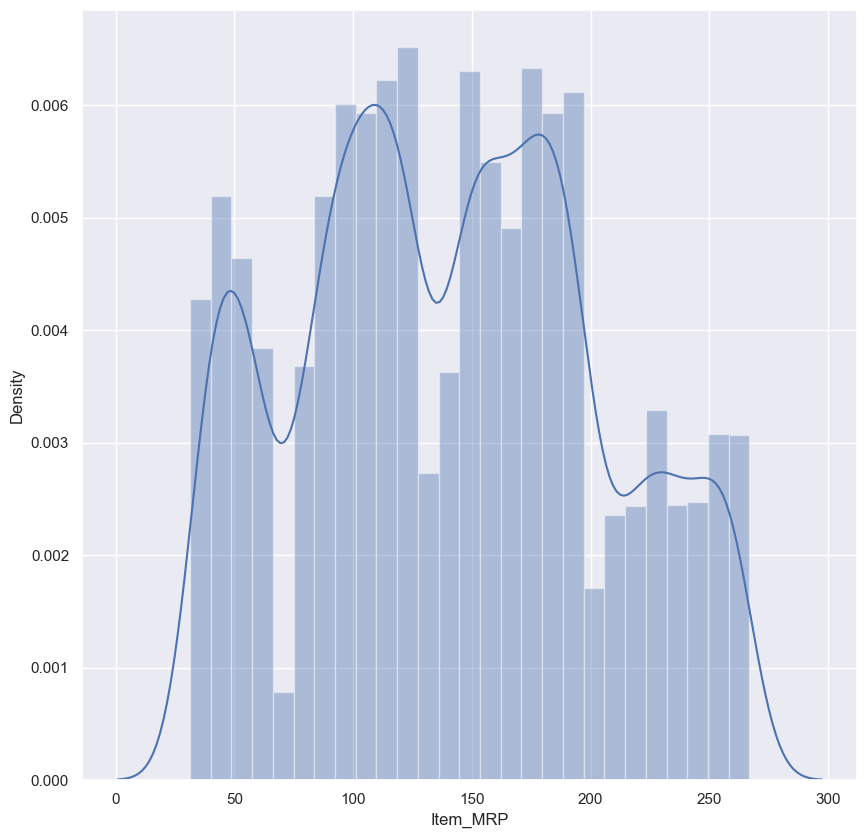

In [13]:
plt.figure(figsize=(10,10))
sns.distplot(mart_df['Item_MRP'])
plt.show()

C:\Users\Jash\AppData\Local\Temp\ipykernel_29248\576120805.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mart_df['Item_Outlet_Sales'])


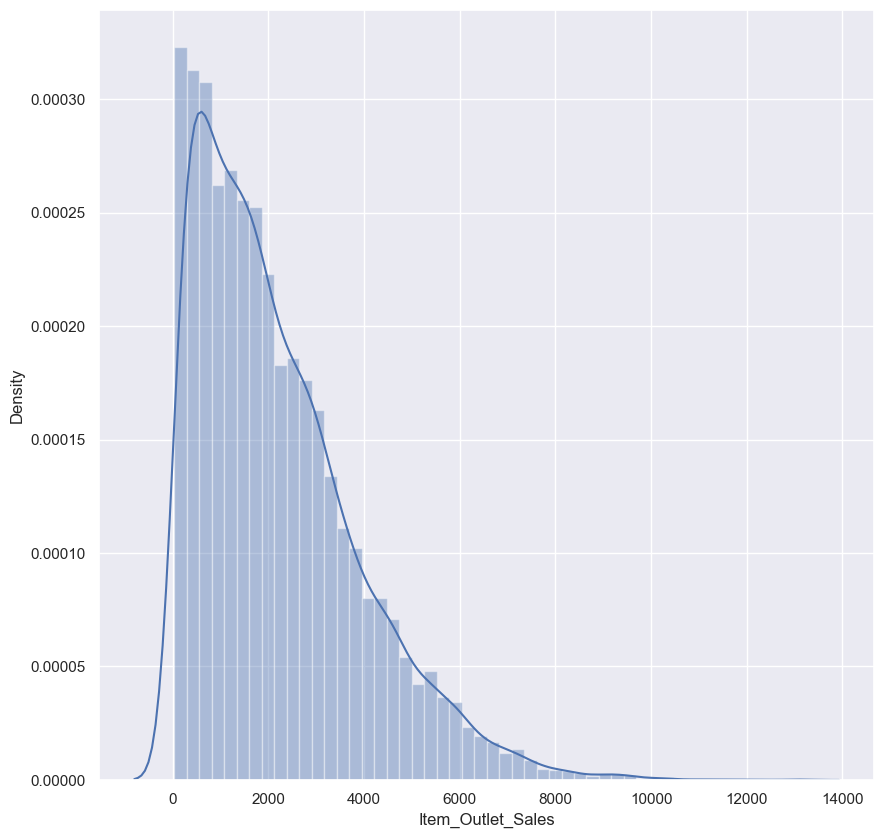

In [14]:
plt.figure(figsize=(10,10))
sns.distplot(mart_df['Item_Outlet_Sales'])
plt.show()

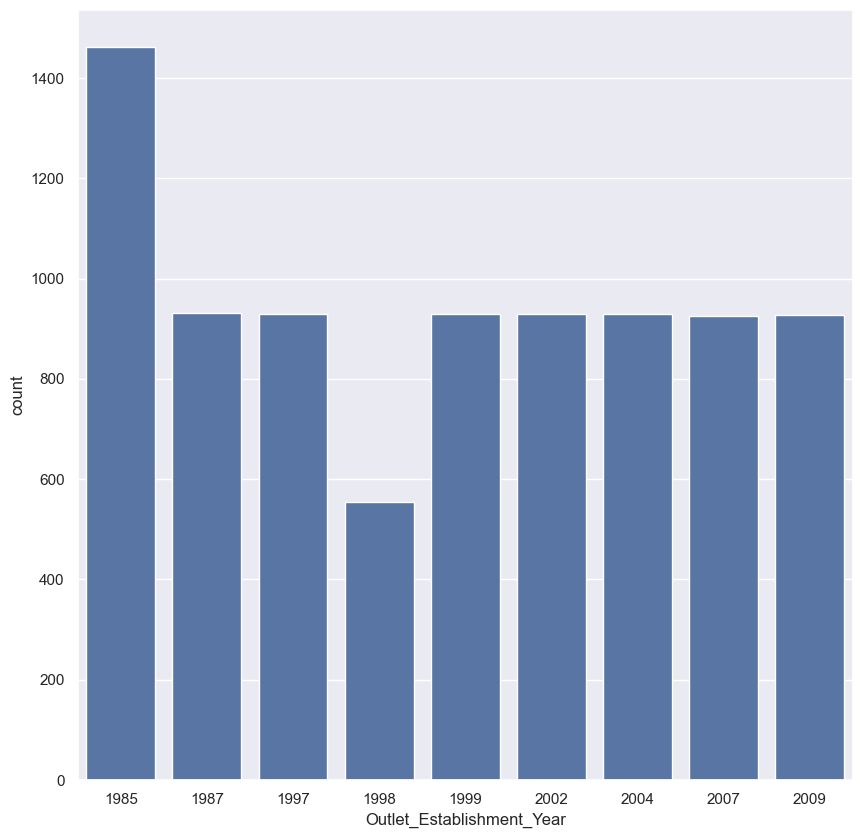

In [15]:
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Establishment_Year', data=mart_df)
plt.show()

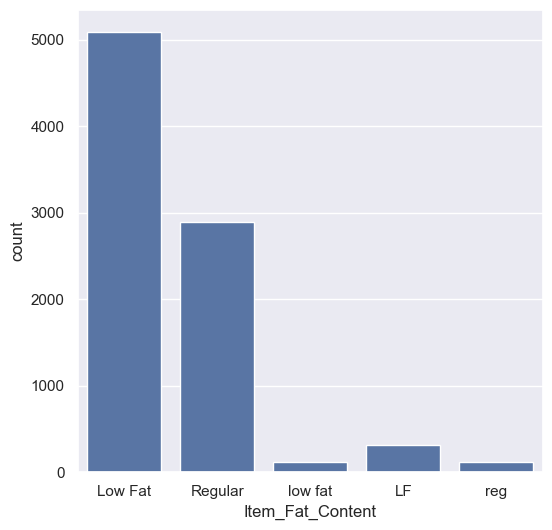

In [16]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=mart_df)
plt.show()

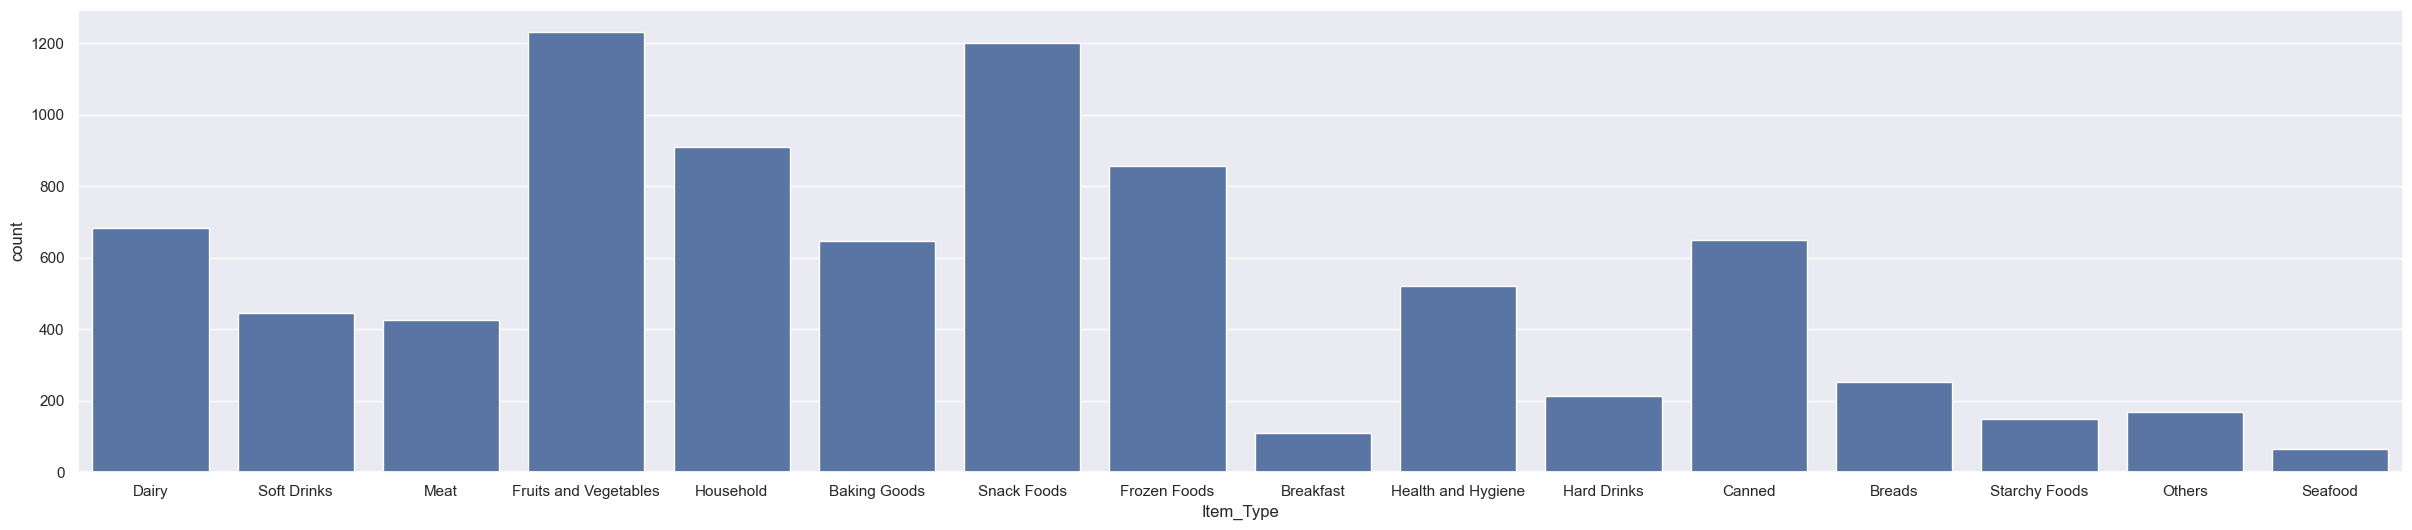

In [17]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=mart_df)
plt.show()

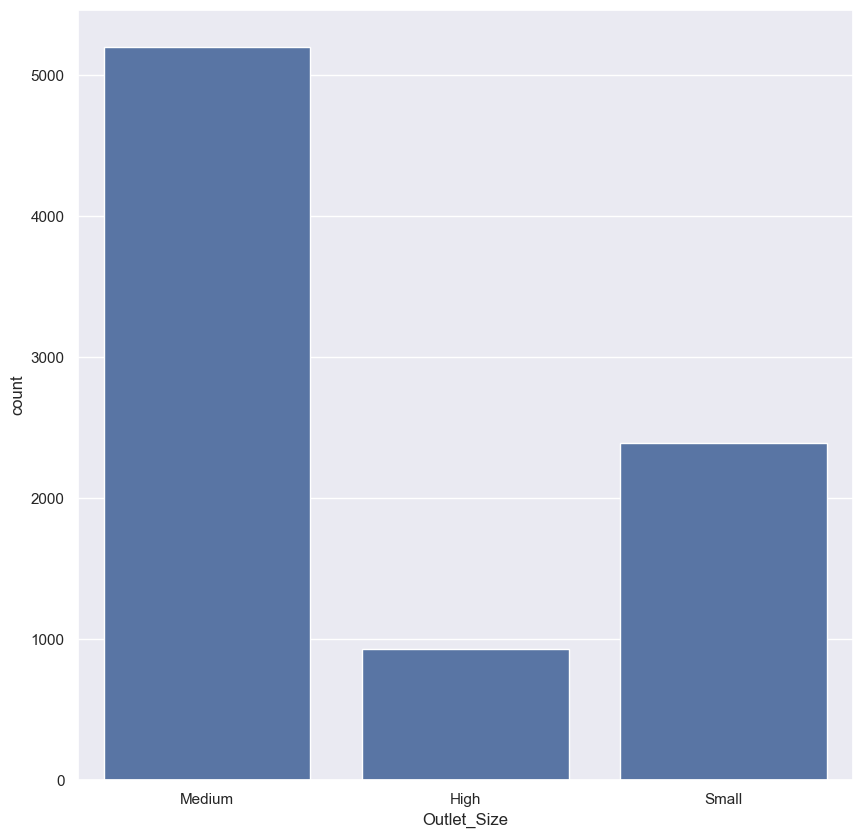

In [19]:
plt.figure(figsize=(10,10))
sns.countplot(x='Outlet_Size', data=mart_df)
plt.show()

In [20]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [22]:
mart_df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [23]:
mart_df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

Label Encoding

In [24]:
encoder = LabelEncoder()

In [25]:
mart_df['Item_Identifier'] = encoder.fit_transform(mart_df['Item_Identifier'])

mart_df['Item_Fat_Content'] = encoder.fit_transform(mart_df['Item_Fat_Content'])

mart_df['Item_Type'] = encoder.fit_transform(mart_df['Item_Type'])

mart_df['Outlet_Identifier'] = encoder.fit_transform(mart_df['Outlet_Identifier'])

mart_df['Outlet_Size'] = encoder.fit_transform(mart_df['Outlet_Size'])

mart_df['Outlet_Location_Type'] = encoder.fit_transform(mart_df['Outlet_Location_Type'])

mart_df['Outlet_Type'] = encoder.fit_transform(mart_df['Outlet_Type'])

In [26]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [28]:
X = mart_df.drop(columns='Item_Outlet_Sales',axis=1)

Y = mart_df.Item_Outlet_Sales

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [38]:
from sklearn.ensemble import RandomForestRegressor

In [39]:
model = RandomForestRegressor()

In [40]:
model.fit(X_train,Y_train)

RandomForestRegressor()

In [41]:
train_pred = model.predict(X_train)

In [42]:
r2_train = metrics.r2_score(Y_train,train_pred)

print(r2_train)

0.9392529966010901


In [43]:
mae = metrics.mean_absolute_error(Y_train,train_pred)

print(mae)

289.2708027371663


In [44]:
test_pred = model.predict(X_test)

In [45]:
r2_test = metrics.r2_score(Y_test,test_pred)

print(r2_test)

0.5528306505025121


In [46]:
mae1 = metrics.mean_absolute_error(Y_test,test_pred)

print(mae1)

822.236703828739


In [47]:
mart_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [49]:
input = (662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1)

input_np = np.asarray(input)

input_reshape = input_np.reshape(1,-1)

predict = model.predict(input_reshape)

print(predict[0])

2047.1818659999976


C:\Users\Jash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
